## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [5]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 8s 156us/step - loss: 0.6253 - accuracy: 0.7748 - val_loss: 2.0324 - val_accuracy: 0.4851
Epoch 49/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.6148 - accuracy: 0.7805 - val_loss: 2.0605 - val_accuracy: 0.4960
Epoch 50/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.6029 - accuracy: 0.7818 - val_loss: 2.1293 - val_accuracy: 0.4780
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.0366 - accuracy: 0.6374 - val_loss: 1.4170 - val_accuracy: 0.5088
Epoch 47/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.0186 - accuracy: 0.6431 - val_loss: 1.3610 - val_accuracy: 0.5285
Epoch 48/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.0114 - accuracy: 0.6456 - val_loss: 1.3721 - val_accuracy: 0.5285
Epoch 49/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.0013 - accuracy: 0.6492 - val_loss: 1.3270 - val_accuracy: 0.5359
Epoch 50/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.9937 - accuracy: 0.6532 - val_loss: 1.3595 - val_accuracy: 0.5300
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

50000/50000 [==============================] - 9s 171us/step - loss: 1.5920 - accuracy: 0.4442 - val_loss: 1.6019 - val_accuracy: 0.4399
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5870 - accuracy: 0.4469 - val_loss: 1.6007 - val_accuracy: 0.4414
Epoch 45/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5821 - accuracy: 0.4482 - val_loss: 1.6048 - val_accuracy: 0.4330
Epoch 46/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5775 - accuracy: 0.4473 - val_loss: 1.5914 - val_accuracy: 0.4423
Epoch 47/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5728 - accuracy: 0.4518 - val_loss: 1.5874 - val_accuracy: 0.4431
Epoch 48/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5690 - accuracy: 0.4536 - val_loss: 1.5838 - val_accuracy: 0.4454
Epoch 49/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5642 - accuracy: 0.4541 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.9821 - accuracy: 0.3094 - val_loss: 1.9798 - val_accuracy: 0.3093
Epoch 42/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9778 - accuracy: 0.3105 - val_loss: 1.9755 - val_accuracy: 0.3114
Epoch 43/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.9736 - accuracy: 0.3119 - val_loss: 1.9714 - val_accuracy: 0.3142
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9695 - accuracy: 0.3140 - val_loss: 1.9674 - val_accuracy: 0.3167
Epoch 45/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.9654 - accuracy: 0.3154 - val_loss: 1.9635 - val_accuracy: 0.3169
Epoch 46/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.9615 - accuracy: 0.3168 - val_loss: 1.9596 - val_accuracy: 0.3186
Epoch 47/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.9576 - accuracy: 0.317

Epoch 39/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.2309 - accuracy: 0.1912 - val_loss: 2.2289 - val_accuracy: 0.1939
Epoch 40/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.2293 - accuracy: 0.1920 - val_loss: 2.2272 - val_accuracy: 0.1954
Epoch 41/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.2277 - accuracy: 0.1940 - val_loss: 2.2256 - val_accuracy: 0.1971
Epoch 42/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.2260 - accuracy: 0.1960 - val_loss: 2.2240 - val_accuracy: 0.1989
Epoch 43/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.2244 - accuracy: 0.1973 - val_loss: 2.2224 - val_accuracy: 0.2006
Epoch 44/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.2228 - accuracy: 0.1984 - val_loss: 2.2208 - val_accuracy: 0.2023
Epoch 45/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.2212 - accuracy: 0.1996

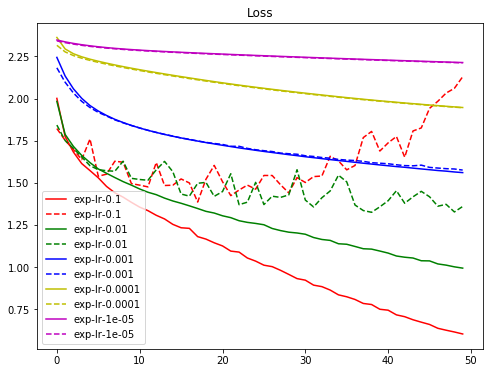

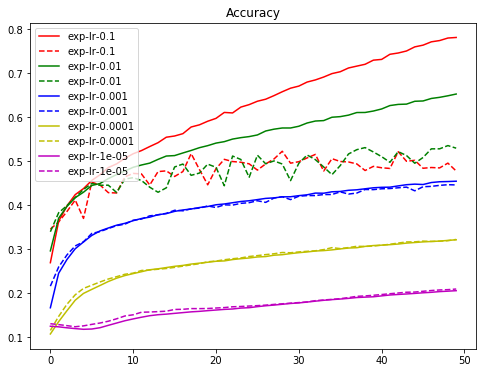

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()